In [1]:
pip install pandas
pip install matplotlib
pip install seaborn
pip install missingno
pip install sklearn
pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, Normalizer

In [39]:
train = pd.read_csv('train.csv', index_col = 'date')
train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
date,,,,,,,,,,,,
2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747


## 결측치 확인

In [41]:
train.isna().sum()

precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

In [42]:
test = pd.read_csv('test.csv')
test.isna().sum()

date               0
precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64

## heatmap

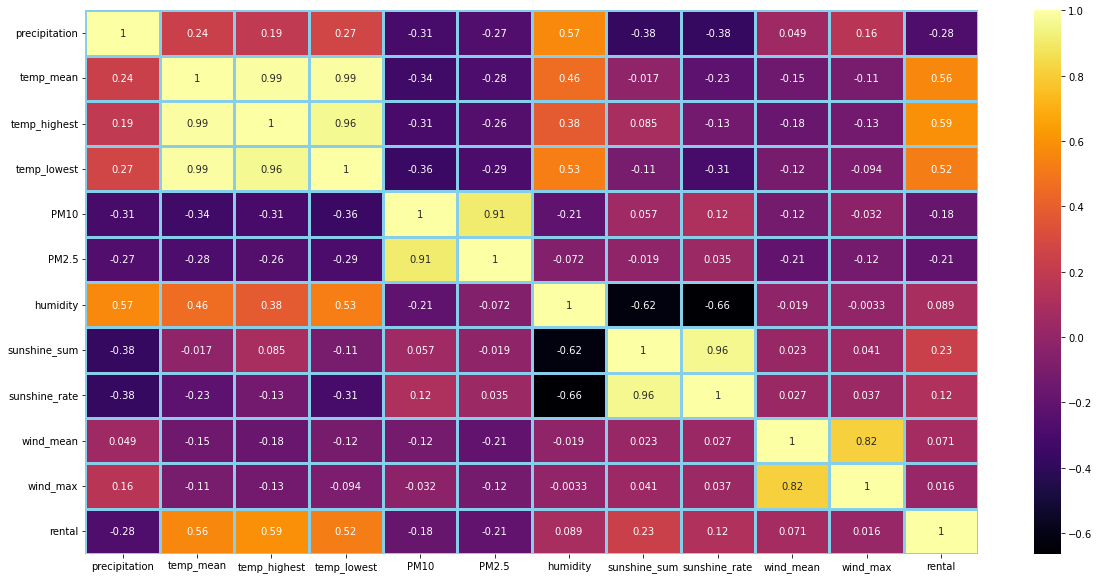

In [43]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, linewidths = 3, cmap = 'inferno', linecolor = 'skyblue',annot_kws={"size": 10})
plt.show()

## Histogram

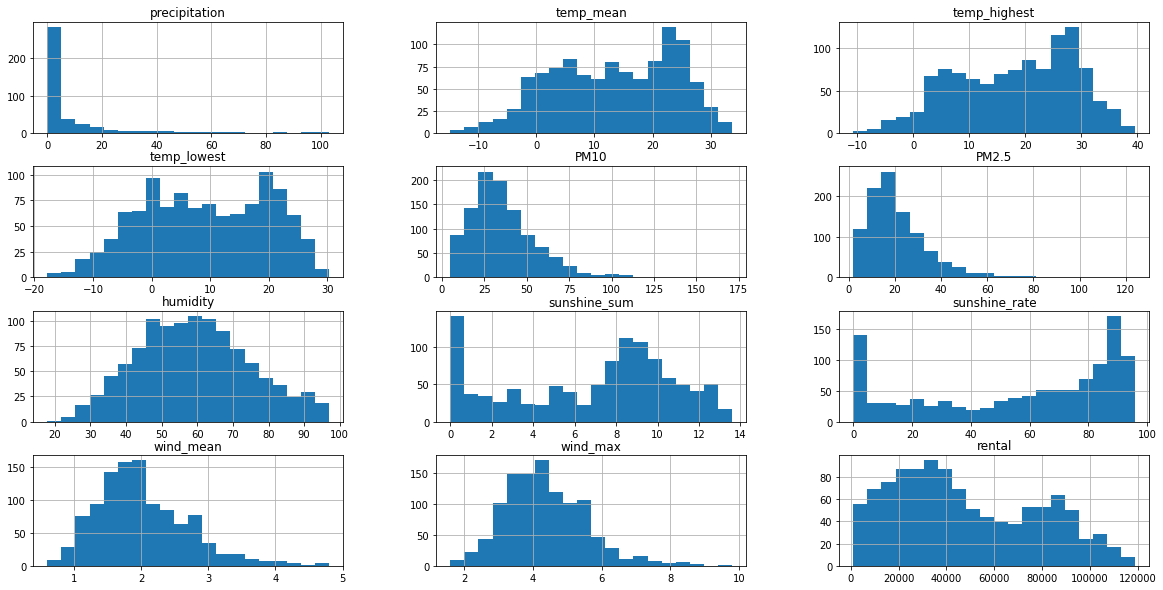

In [44]:
train.hist(bins=20, grid =True, figsize=(20,10));

In [45]:
train[train.PM10.isna()].index

Index(['2018-02-17', '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24',
       '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
       '2018-03-30', '2018-03-31', '2018-04-01', '2018-04-02', '2018-04-03',
       '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
       '2018-04-20', '2018-05-18', '2018-05-19', '2018-05-22', '2018-05-23',
       '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-29', '2018-05-30',
       '2018-05-31', '2018-06-03', '2018-06-06', '2018-06-07', '2018-06-08',
       '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13',
       '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18',
       '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-23', '2018-06-24',
       '2018-06-25', '2018-06-27', '2018-06-28', '2018-06-29', '2018-07-04',
       '2018-07-05', '2018-11-18', '2019-03-09', '2019-03-10', '2019-03-11',
       '2019-03-12', '2019-03-13', '2019-03-16', '2019-03-17', '2019-09-08',

## Missingvalue graph

<AxesSubplot:>

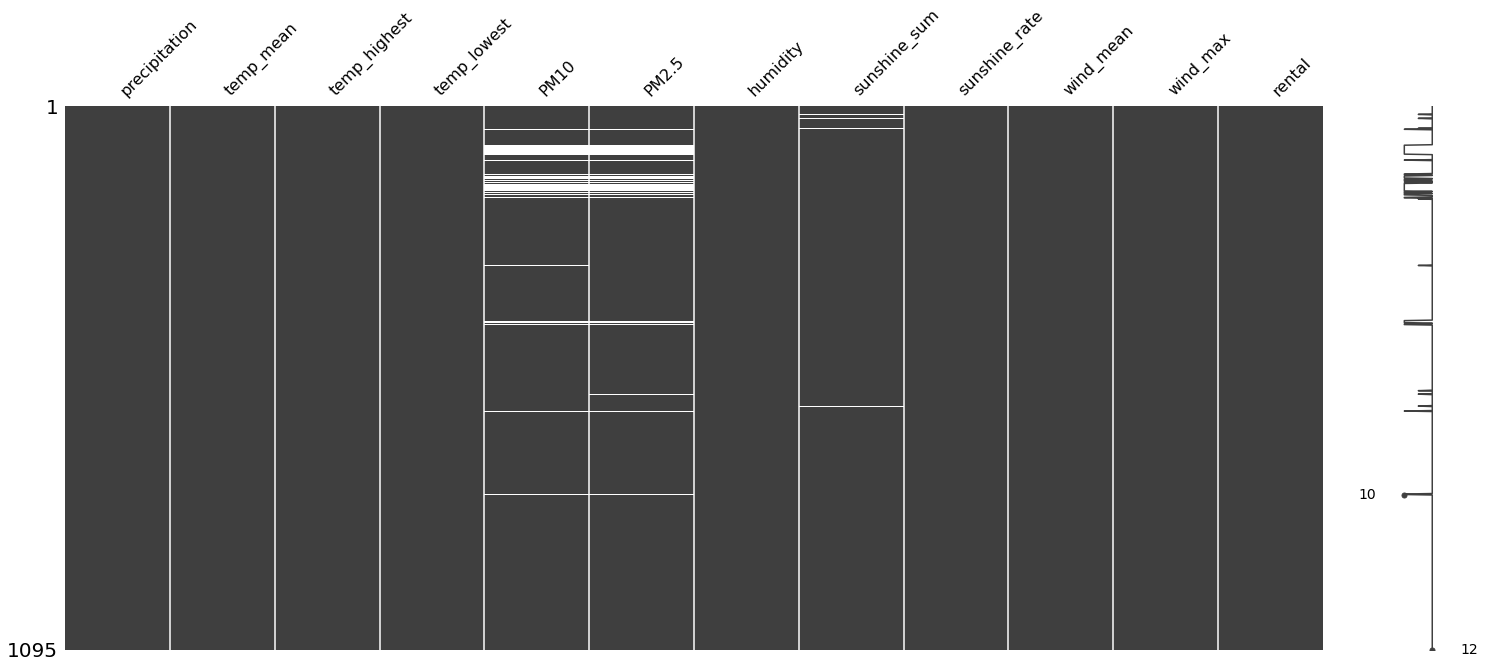

In [52]:
msno.matrix(train)

## 다중대체

In [53]:
dummy = pd.get_dummies(train)

In [54]:
dummy

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
date,,,,,,,,,,,,
2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747


In [72]:
train_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(dummy))
train_impute

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950.0
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136.0
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156.0
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102.0
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103.0
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912.0
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747.0
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488.0


## 다중대체 적용 1~150 index

/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='4'>

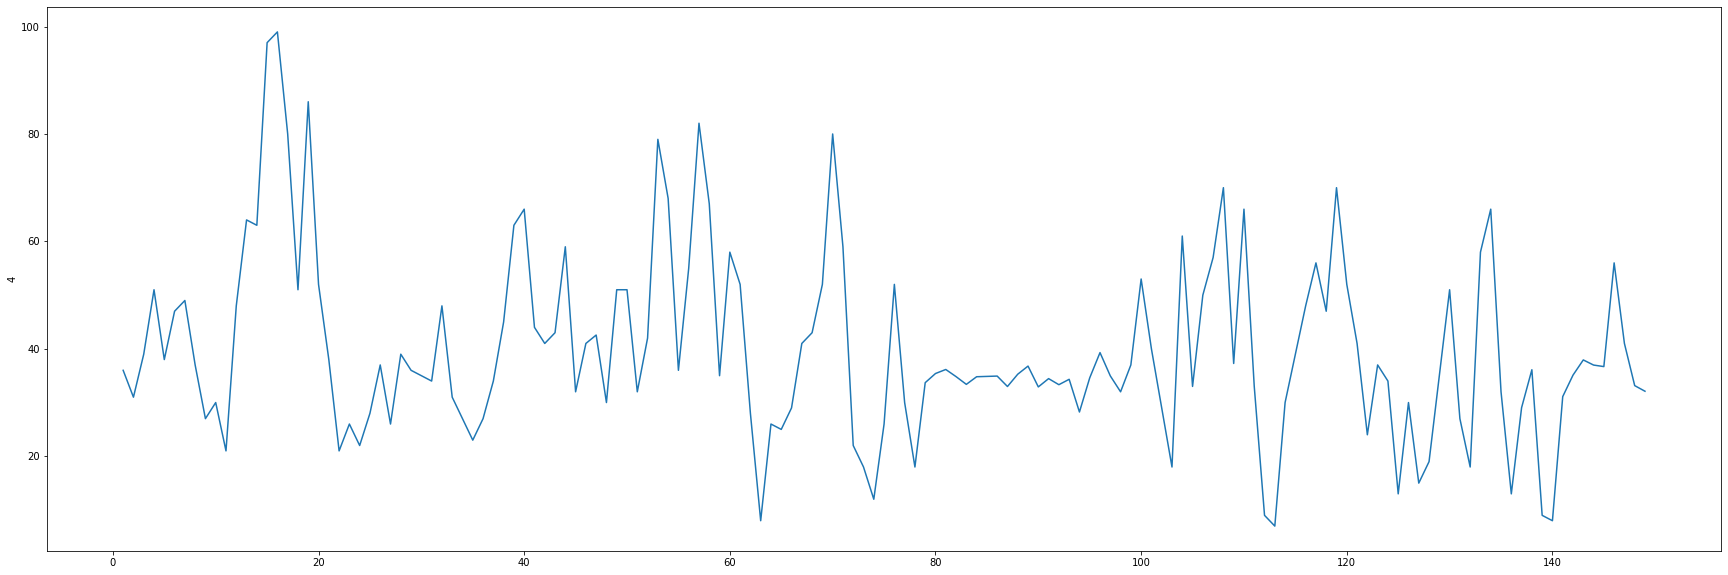

In [71]:
plt.figure(figsize =(30,10))
sns.lineplot(train_impute.iloc[1:150].index,train_impute.iloc[1:150][4])

## 원본 1~150 index

/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date', ylabel='PM10'>

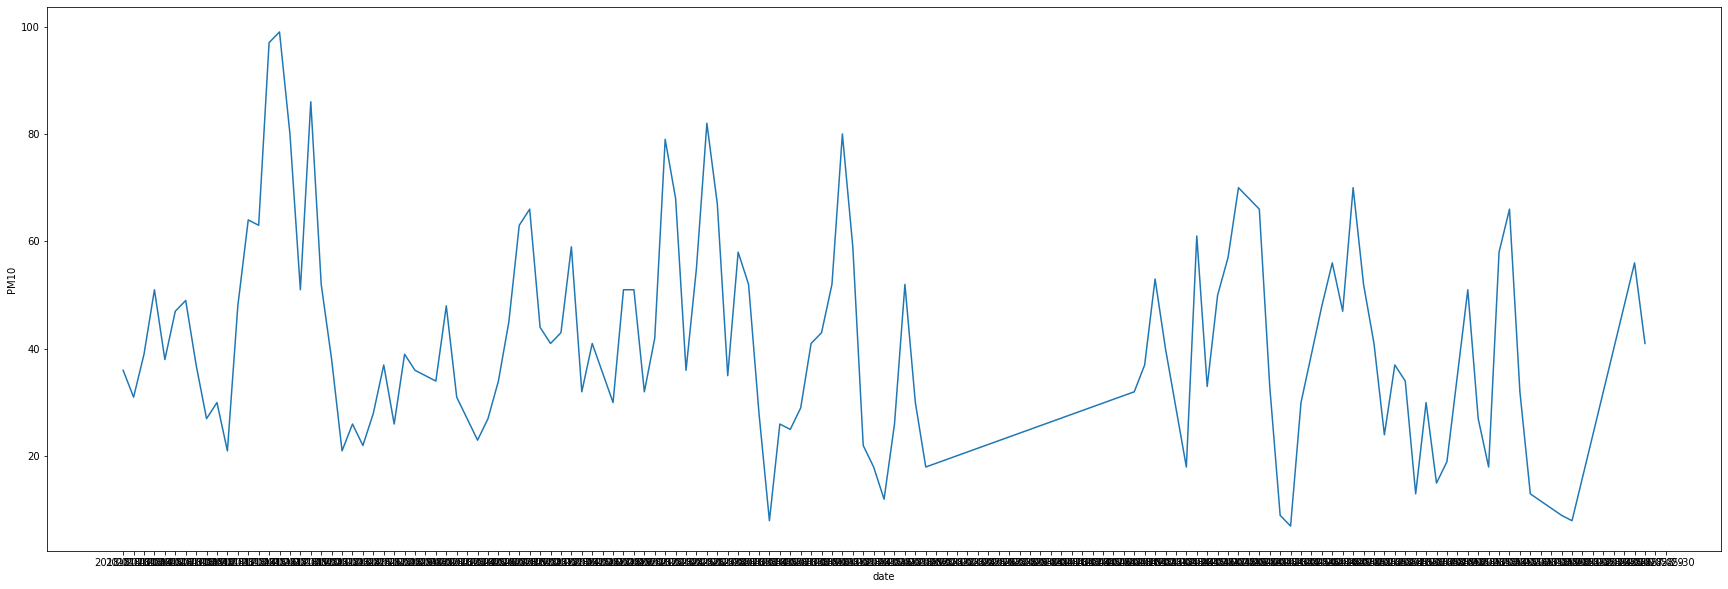

In [68]:
plt.figure(figsize =(30,10))
sns.lineplot(train.iloc[1:150].index, train.iloc[1:150]['PM10'])

## 스케일링 이후 다중대체

In [75]:
scaler = StandardScaler()
z = scaler.fit_transform(train)
z

array([[-0.29295359, -1.39312213, -1.3572249 , ..., -0.9039726 ,
        -0.47174591, -1.44823809],
       [-0.29295359, -1.44089814, -1.54662926, ..., -0.31468848,
         0.4555027 , -1.37522866],
       [-0.29295359, -1.71799897, -1.75497405, ...,  0.27459564,
        -0.72463189, -1.37456068],
       ...,
       [-0.27617486, -1.25934932, -1.30987381, ...,  1.30584284,
         1.46704664, -0.41966012],
       [-0.29295359, -2.31042144, -2.30424668, ...,  3.0736952 ,
         1.55134197, -0.86249271],
       [-0.29295359, -2.11931741, -2.19060406, ...,  0.56923769,
        -0.1345646 , -0.79412569]])

In [79]:
z = pd.DataFrame(z)
z.shape

(1095, 12)

In [81]:
z.isna().sum()

0      0
1      0
2      0
3      0
4     67
5     68
6      0
7      5
8      0
9      0
10     0
11     0
dtype: int64

In [82]:
z_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(z))
z_impute

/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.292954,-1.393122,-1.357225,-1.342314,-0.102620,-0.332735,-1.280371,0.383388,0.921466,-0.903973,-0.471746,-1.448238
1,-0.292954,-1.440898,-1.546629,-1.267124,-0.002579,0.034310,-1.095331,0.282715,0.793470,-0.314688,0.455503,-1.375229
2,-0.292954,-1.717999,-1.754974,-1.530288,-0.252681,-0.185917,-1.076189,0.458893,0.988511,0.274596,-0.724632,-1.374561
3,-0.292954,-1.717999,-1.783385,-1.680667,0.147482,0.181128,-1.031524,-0.145145,0.232729,-0.903973,-0.724632,-1.376364
4,-0.292954,-1.555561,-1.565570,-1.389308,0.747727,0.988627,-0.686966,0.358220,0.860516,-0.462010,-0.640337,-1.356225
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,-0.292954,-0.714703,-0.770071,-0.731399,1.698116,1.502490,0.238236,-0.220649,0.159589,-0.314688,-1.314699,-0.374372
1091,-0.183892,-0.628706,-0.637488,-0.468235,1.498034,1.649308,0.825261,0.307884,0.823946,-0.903973,-1.061813,-0.046764
1092,-0.276175,-1.259349,-1.309874,-1.445700,1.648095,1.796126,0.742312,-1.705575,-1.714627,1.305843,1.467047,-0.419660
1093,-0.292954,-2.310421,-2.304247,-2.075412,0.147482,-0.479553,-0.233936,0.383388,0.921466,3.073695,1.551342,-0.862493


/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='4'>

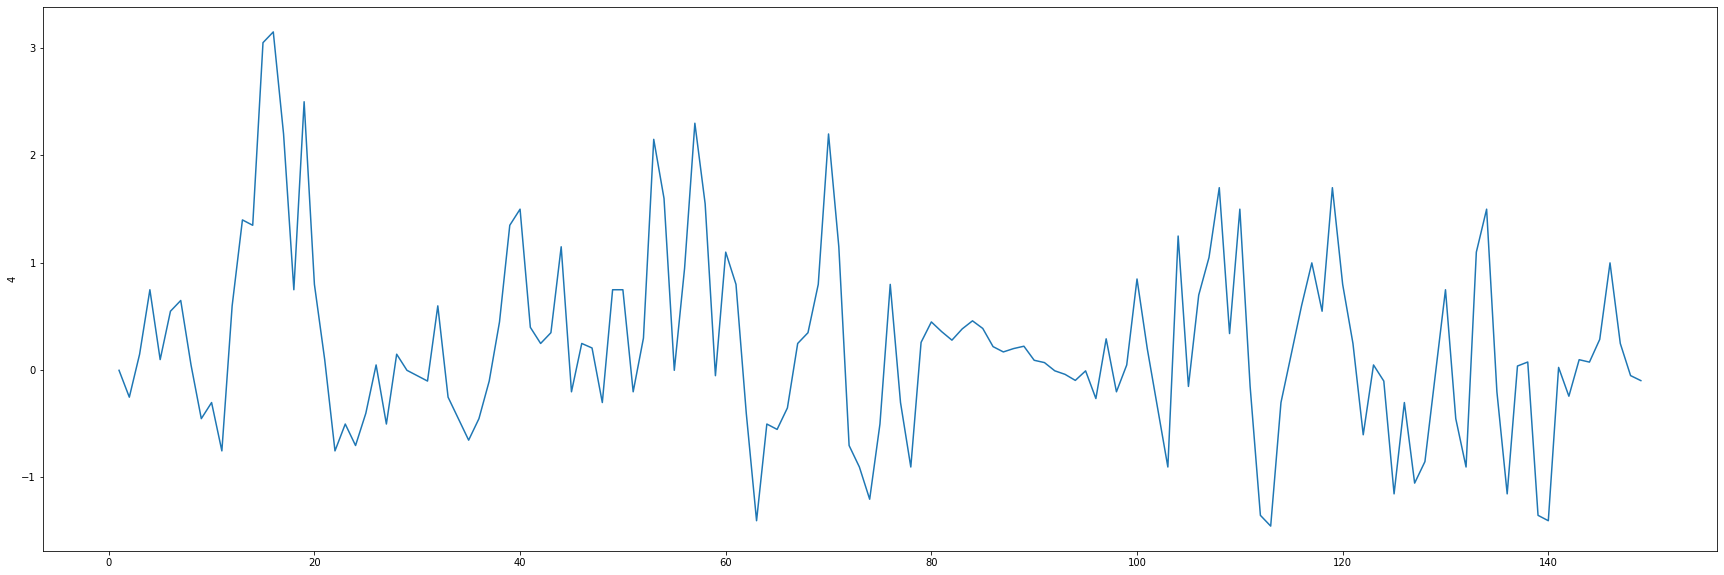

In [92]:
plt.figure(figsize =(30,10))
sns.lineplot(z_impute[1:150].index,z_impute[4][1:150])